Covid Data Analysis

In [ ]:
# Importing necessary libraries 
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Setting range of years, months and days to be iterated through in the URL later
days = [str(i).zfill(2) for i in range(1,32)]
months = [str(j).zfill(2) for j in range(1,13)]
years = [str(k) for k in range (2020,2023)]

In [3]:
# Creating the dates list 
dates = []
for year in years:
    for month in months:
        for day in days:
            date = month + '-' + day + '-' + year
            dates.append(date)

In [4]:
# Creating the urls list 
urls = []
for date in dates:
    url_covid = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/' + date + '.csv'
    urls.append(url_covid)


In [5]:
# Creating the results dictinionary 
import urllib.error
results={}
for url in urls:
    try:
        result = pd.read_csv(url)
    except urllib.error.HTTPError:
        continue
        
    _date = url.split('/')[-1].split('.')[0]
    results[_date]=result

In [6]:
# Creating the dictionary based on Census Bureau-designated regions and divisions
us = {'New England':['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'], 'Mid_Atlantic':['New Jersey', 'New York', 'Pennsylvania'], 'East North Central':['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin'], 'West North Central':['Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'], 'South Atlantic':['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia'], 'East South Central':['Alabama', 'Kentucky', 'Mississippi', 'Tennessee'], 'West South Central':['Arkansas', 'Louisiana', 'Oklahoma', 'Texas'], 'Mountain':['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming'], 'Pacific':['Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']}

In [7]:
# Creating the new dictionary by reversing the key and value in the dictionary created above

new_us_dict = {}
for key,value in us.items():
    for ad in value:
        new_us_dict[ad] = key 
print(new_us_dict)

{'Connecticut': 'New England', 'Maine': 'New England', 'Massachusetts': 'New England', 'New Hampshire': 'New England', 'Rhode Island': 'New England', 'Vermont': 'New England', 'New Jersey': 'Mid_Atlantic', 'New York': 'Mid_Atlantic', 'Pennsylvania': 'Mid_Atlantic', 'Illinois': 'East North Central', 'Indiana': 'East North Central', 'Michigan': 'East North Central', 'Ohio': 'East North Central', 'Wisconsin': 'East North Central', 'Iowa': 'West North Central', 'Kansas': 'West North Central', 'Minnesota': 'West North Central', 'Missouri': 'West North Central', 'Nebraska': 'West North Central', 'North Dakota': 'West North Central', 'South Dakota': 'West North Central', 'Delaware': 'South Atlantic', 'Florida': 'South Atlantic', 'Georgia': 'South Atlantic', 'Maryland': 'South Atlantic', 'North Carolina': 'South Atlantic', 'South Carolina': 'South Atlantic', 'Virginia': 'South Atlantic', 'District of Columbia': 'South Atlantic', 'West Virginia': 'South Atlantic', 'Alabama': 'East South Central

In [8]:
df_results = pd.DataFrame()
for key in list(results.keys()):
    new_date = results[key]
    new_date['Date'] = key
    df_results = pd.concat([df_results,new_date])
df_results.head()


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
0,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3667,93,NaN,NaN,1.0,...,NaN,437.0,NaN,84000001.0,USA,NaN,12.264945,04-12-2020,62029.0,2.536133
1,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,198.0,2.0,...,NaN,31.0,NaN,84000002.0,USA,1344.711576,11.397059,04-12-2020,8038.0,2.941176
2,American Samoa,US,NaN,-14.2710,-170.1322,0,0,NaN,NaN,60.0,...,NaN,NaN,NaN,16.0,ASM,5.391708,NaN,04-12-2020,3.0,NaN
3,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,NaN,NaN,4.0,...,NaN,NaN,NaN,84000004.0,USA,578.522286,NaN,04-12-2020,52289.0,3.246753
4,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,886.0,5.0,...,NaN,130.0,NaN,84000005.0,USA,761.753354,10.156250,04-12-2020,19722.0,2.109375


In [9]:
df_results.shape

(53784, 21)

In [10]:
df_results = df_results.drop(df_results[df_results.Province_State.isin(['Diamond Princess', 'Grand Princess', 'Guam', 'Puerto Rico', 'American Samoa', 'Northern Mariana Islands', 'Recovered', 'Virgin Islands'])].index)

In [11]:
df_results['Regions'] = df_results.Province_State.map(new_us_dict)

In [12]:
df_results = df_results.dropna(subset=['Regions'])

In [13]:
df_results.reset_index(inplace=True)

In [14]:
new_results = df_results[['Date', 'Province_State', 'Regions', 'Confirmed', 'Deaths', 'People_Hospitalized', 'Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate']]
new_results.head()

,Date,Province_State,Regions,Confirmed,Deaths,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,04-12-2020,Alabama,East South Central,3667,93,437.0,2.536133,NaN,12.264945
1,04-12-2020,Alaska,Pacific,272,8,31.0,2.941176,1344.711576,11.397059
2,04-12-2020,Arizona,Mountain,3542,115,NaN,3.246753,578.522286,NaN
3,04-12-2020,Arkansas,West South Central,1280,27,130.0,2.109375,761.753354,10.156250
4,04-12-2020,California,Pacific,22201,632,5234.0,2.842214,485.423869,22.961176


In [15]:
df_plot = new_results.groupby(['Date', 'Regions'], as_index=False)[['Date', 'Regions', 'Confirmed']].mean().round(0)
first_data = df_plot[df_plot.Date.str.endswith('2020')]
second_data = df_plot[df_plot.Date.str.endswith('2021')]
third_data = df_plot[df_plot.Date.str.endswith('2022')]
join_data = [first_data, second_data,third_data]
end_data = pd.concat(join_data)
end_data.reset_index(inplace=True)
end_data.head()


,index,Date,Regions,Confirmed
0,1818,04-12-2020,East North Central,12594.0
1,1819,04-12-2020,East South Central,3450.0
2,1820,04-12-2020,Mid_Atlantic,91367.0
3,1821,04-12-2020,Mountain,2976.0
4,1822,04-12-2020,New England,8347.0


In [16]:
dates_x = end_data.Date.unique().tolist()
print([dates_x[0],dates_x[-1],len(dates_x)])

['04-12-2020', '10-25-2022', 927]


In [17]:
x_indexes = np.arange(len(dates_x))

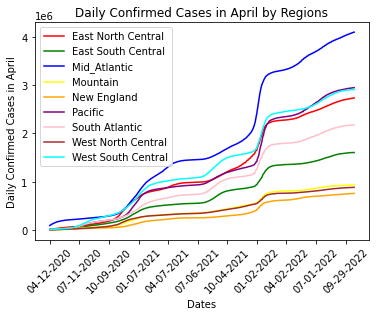

'The line graph illustrates changes in the levels of average daily COVID-19 confirmed cases in nine US regions from 2020 to 2022 and is measured in the number of people infected. Overall, it can be seen that, over the period as a whole the levels of confirmed cases rose in all nine regions.\nMoving to a more detailed analysis, the total average number of confirmed cases  in the Mid-Atlantic region increased dramatically and they overtook all eight regions from the first quarter of 2021. \nPacific, East North Central, and West South Central are the next regions with highest confirmed cases and followed a similar trend, increasing steadily to approximately 30%. \nFinally, if you look for patterns you will see that Mountain, New England and West North Central regions follow a similar pattern (increasing gradually over the period) which tells us the mentioned regions had more effective preventive actions.'

In [18]:
region_colors = {"East North Central":'red', 'East South Central':'green', 'Mid_Atlantic':'blue', 'Mountain':'yellow','New England':'orange', 'Pacific':'purple','South Atlantic':'pink','West North Central':'brown','West South Central':'cyan'}
for region in end_data['Regions'].unique().tolist():
    plt.plot(x_indexes, end_data.loc[end_data.Regions == region, 'Confirmed'], region_colors[region], label=region)
plt.xlabel('Dates')
plt.ylabel('Daily Confirmed Cases in April')
plt.title('Daily Confirmed Cases in April by Regions')
plt.xticks(ticks = x_indexes[::90], labels = dates_x[::90], rotation=45)
plt.legend()
plt.show()

'''The line graph illustrates changes in the levels of average daily COVID-19 confirmed cases in nine US regions from 2020 to 2022 and is measured in the number of people infected. Overall, it can be seen that, over the period as a whole the levels of confirmed cases rose in all nine regions.
Moving to a more detailed analysis, the total average number of confirmed cases  in the Mid-Atlantic region increased dramatically and they overtook all eight regions from the first quarter of 2021. 
Pacific, East North Central, and West South Central are the next regions with highest confirmed cases and followed a similar trend, increasing steadily to approximately 30%. 
Finally, if you look for patterns you will see that Mountain, New England and West North Central regions follow a similar pattern (increasing gradually over the period) which tells us the mentioned regions had more effective preventive actions.'''